In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
dataset = pd.read_csv("C:\\Users\\chsin\\OneDrive\\Desktop\\titanic.csv")

In [54]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
print('Median of Age column: %.2f' %(dataset["Age"].median(skipna=True)))
print('Percent of missing records in the Cabin column: %.2f%%' %((dataset['Cabin'].isnull().sum()/dataset.shape[0])*100))
print('Most common boarding port of embarkation: %s' %dataset['Embarked'].value_counts().idxmax())

Median of Age column: 27.00
Percent of missing records in the Cabin column: 78.23%
Most common boarding port of embarkation: S


In [57]:
dataset["Age"].fillna(dataset["Age"].median(skipna=True), inplace=True)
dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(), inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)

In [58]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [59]:
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket',  axis=1, inplace=True)

In [60]:
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0, 0, 1)
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Parch', axis=1, inplace=True)

In [61]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,34.5,7.8292,Q,1
1,1,3,female,47.0,7.0000,S,0
2,0,2,male,62.0,9.6875,Q,1
3,0,3,male,27.0,8.6625,S,1
4,1,3,female,22.0,12.2875,S,0


In [62]:

dataset.shape

(418, 7)

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    object 
 6   TravelAlone  418 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 21.4+ KB


In [64]:
dataset.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,418.000000,418.000000,418.000000,417.000000,418.000000
mean,0.363636,2.265550,29.599282,35.627188,0.605263
std,0.481622,0.841838,12.703770,55.907576,0.489380
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,7.895800,0.000000
50%,0.000000,3.000000,27.000000,14.454200,1.000000
75%,1.000000,3.000000,35.750000,31.500000,1.000000
max,1.000000,3.000000,76.000000,512.329200,1.000000


c:\Users\chsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      266
female    152
Name: Sex, dtype: int64

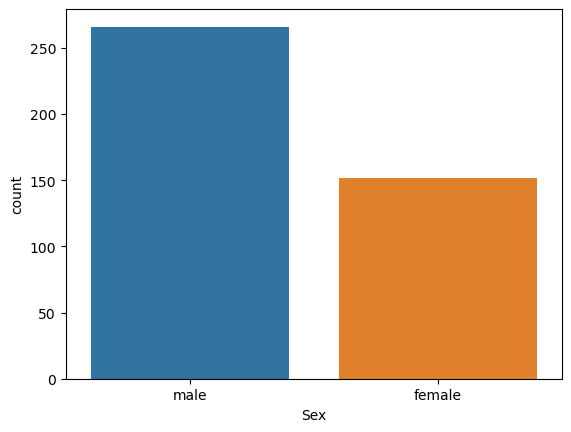

In [65]:
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

,Sex,Survived
0,female,1.0
1,male,0.0


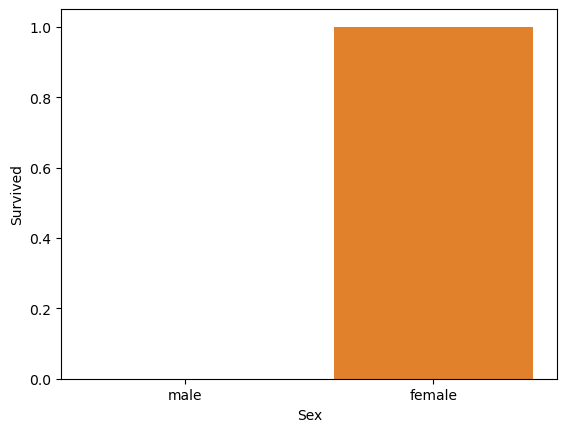

In [66]:
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

<AxesSubplot:xlabel='Survived', ylabel='count'>

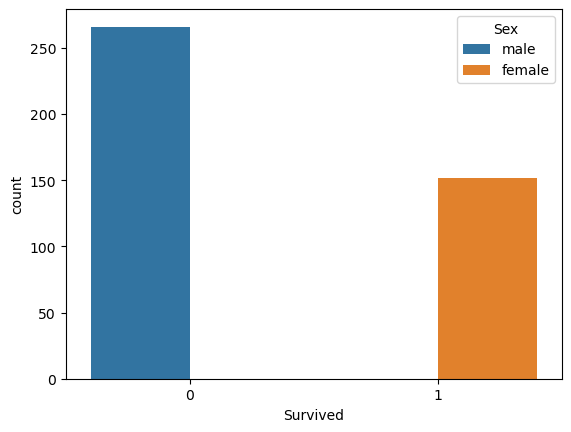

In [67]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

c:\Users\chsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    218
1    107
2     93
Name: Pclass, dtype: int64

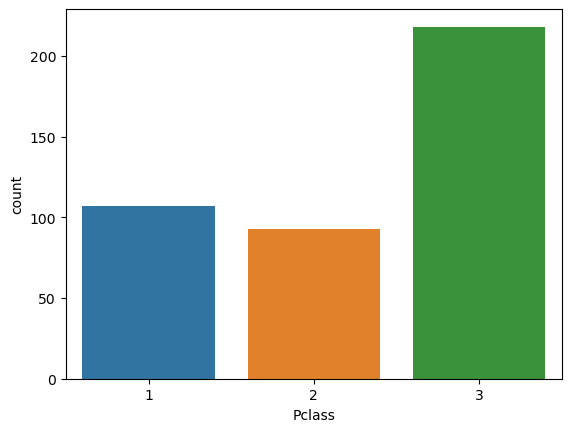

In [68]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


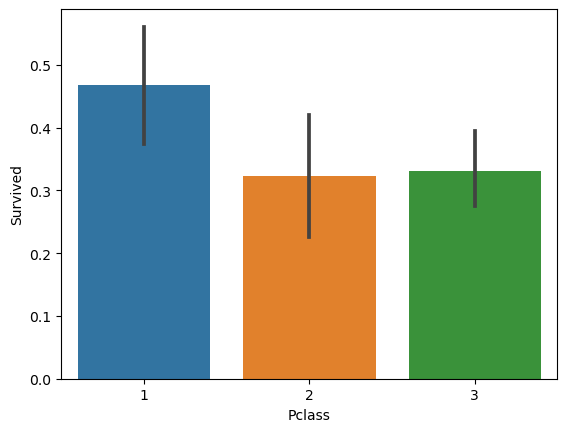

In [69]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

<AxesSubplot:xlabel='Survived', ylabel='count'>

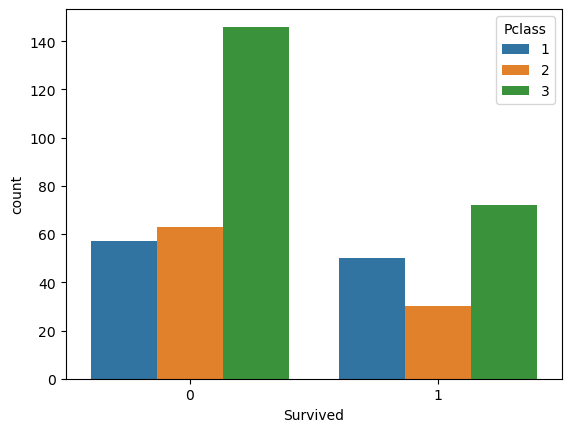

In [70]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)

The Median age of passengers is : 27


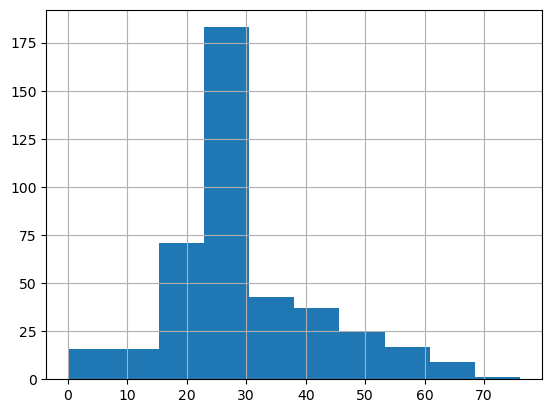

In [71]:
dataset.Age.hist()
print("The Median age of passengers is :", int(dataset.Age.median()))

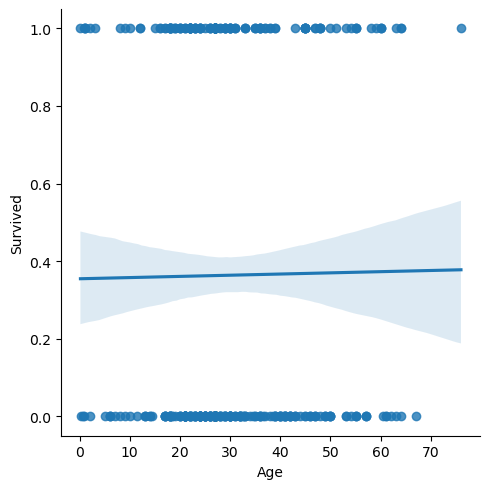

In [72]:
sns.lmplot(x='Age',y='Survived',data=dataset)

c:\Users\chsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


S    270
C    102
Q     46
Name: Embarked, dtype: int64

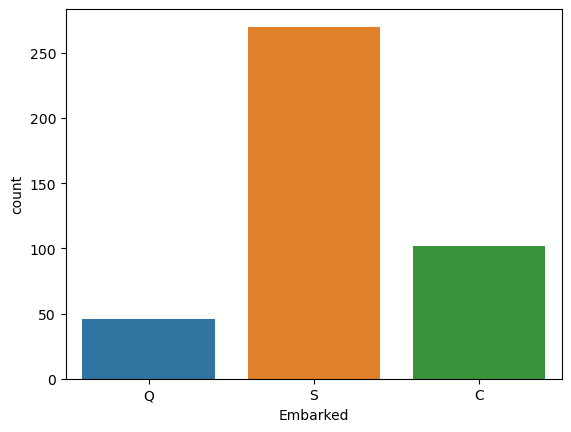

In [73]:
sns.countplot('Embarked',data=dataset)
dataset['Embarked'].value_counts()

,Embarked,Survived
0,C,0.392157
1,Q,0.521739
2,S,0.325926


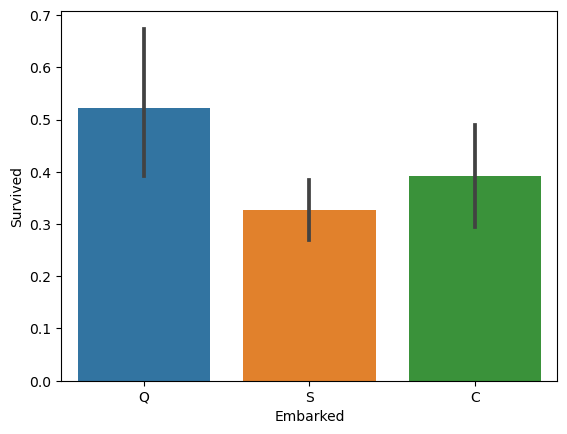

In [74]:
sns.barplot(x='Embarked',y='Survived',data=dataset)
dataset.groupby('Embarked',as_index=False).Survived.mean()

<AxesSubplot:xlabel='Survived', ylabel='count'>

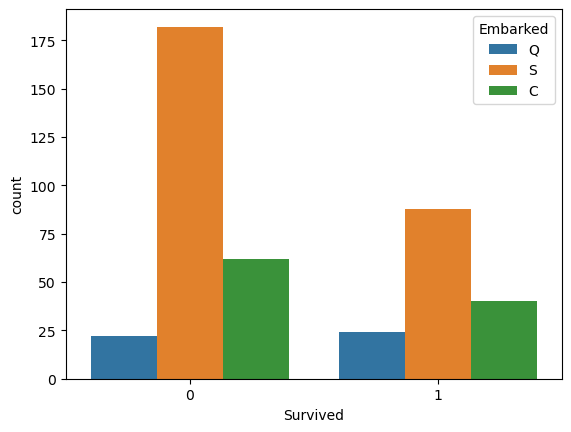

In [75]:
sns.countplot(x='Survived', hue='Embarked', data=dataset)

c:\Users\chsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    253
0    165
Name: TravelAlone, dtype: int64

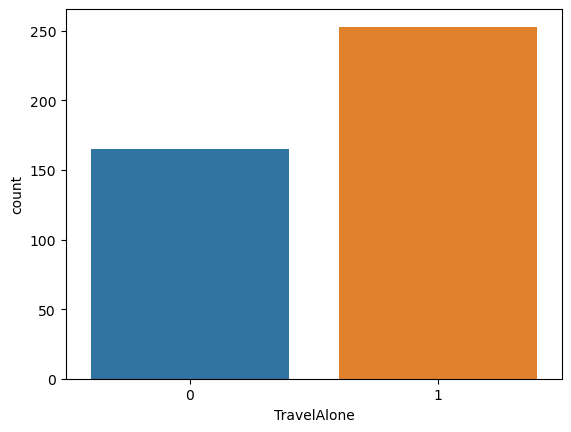

In [76]:
sns.countplot('TravelAlone',data=dataset)
dataset['TravelAlone'].value_counts()


,TravelAlone,Survived
0,0,0.509091
1,1,0.268775


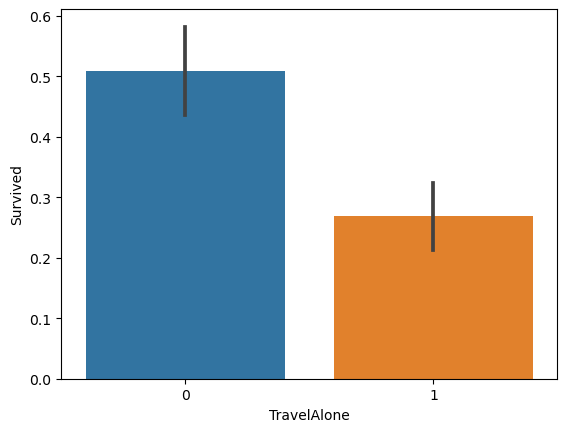

In [77]:
sns.barplot(x='TravelAlone',y='Survived',data=dataset)
dataset.groupby('TravelAlone',as_index=False).Survived.mean()

c:\Users\chsin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    266
1    152
Name: Survived, dtype: int64

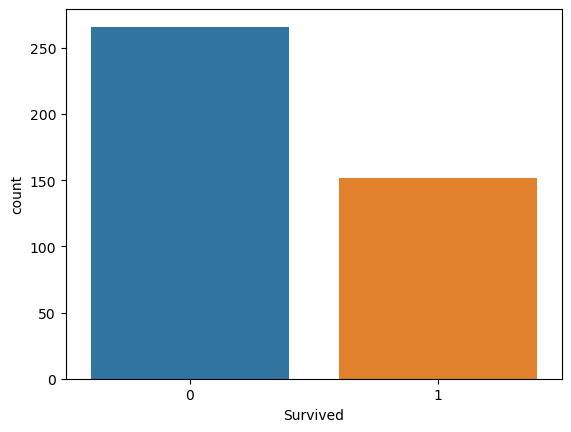

In [78]:
sns.countplot('Survived',data=dataset)
dataset['Survived'].value_counts()

In [79]:
dataset.corr()

,Survived,Pclass,Age,Fare,TravelAlone
Survived,1.000000,-0.108615,0.008035,0.191514,-0.244187
Pclass,-0.108615,1.000000,-0.467853,-0.577147,0.173555
Age,0.008035,-0.467853,1.000000,0.347105,-0.040355
Fare,0.191514,-0.577147,0.347105,1.000000,-0.282491
TravelAlone,-0.244187,0.173555,-0.040355,-0.282491,1.000000


In [80]:
from sklearn import preprocessing
  
#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column Sex and Embarked
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']= label_encoder.fit_transform(dataset['Embarked'])

In [81]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,34.5,7.8292,1,1
1,1,3,0,47.0,7.0000,2,0
2,0,2,1,62.0,9.6875,1,1
3,0,3,1,27.0,8.6625,2,1
4,1,3,0,22.0,12.2875,2,0


In [82]:
X = dataset.drop('Survived', 1)
y = dataset.Survived

C:\Users\chsin\AppData\Local\Temp\ipykernel_22448\2419027415.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop('Survived', 1)


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [109]:
from sklearn.linear_model import  LogisticRegression
linear_model = LogisticRegression()
lr_model.fit(X_test, y_test)

LogisticRegression()

In [113]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))


Accuracy of the model: 100.00


In [115]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
a.head()

,Actual value,Predicted value
146,0,0
223,0,0
193,0,0
305,1,1
188,1,1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



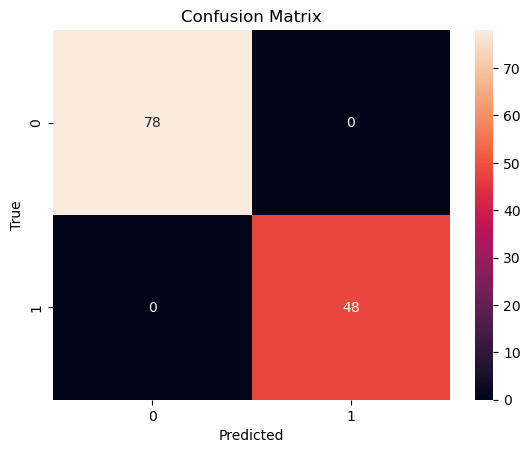

In [116]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test, y_pred))